# <center>CITS5508 Lab sheet 4</center>

**Name:** Alastair Mory<br>
**Student number:** 21120848<br>
**Date created:** March 16th 2019<br>
**Last modified:** April 23rd 2019<br>

### Table of Contents



<a id='import_header'/></a>

In [1]:
from copy import deepcopy as dc
from typing import (Any, List, Tuple)
import warnings

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn as sk
from sklearn import (
    decomposition,
    ensemble,
    linear_model,
    metrics,
    model_selection,
    preprocessing,
    pipeline,
    svm
)


# Disable Sklearn Warnings
def warn(*args, **kwargs):
    pass
warnings.warn = warn

## 1. Oxford Parkinsons Disease Detection Data Set

-----------------------------------------------------	

Data Set Characteristics: Multivariate<br>
Number of Instances: 197<br>
Attribute Characteristics: Real<br>
Number of Attributes: 23<br>
Associated Tasks: Classification<br>
Missing Values? N/A<br>

-----------------------------------------------------	
### Source:

The dataset was created by Max Little of the University of Oxford, in 
collaboration with the National Centre for Voice and Speech, Denver, 
Colorado, who recorded the speech signals. The original study published the 
feature extraction methods for general voice disorders.

-----------------------------------------------------
### Data Set Information:

This dataset is composed of a range of biomedical voice measurements from 
31 people, 23 with Parkinson's disease (PD). Each column in the table is a 
particular voice measure, and each row corresponds one of 195 voice 
recording from these individuals ("name" column). The main aim of the data 
is to discriminate healthy people from those with PD, according to "status" 
column which is set to 0 for healthy and 1 for PD.

The data is in ASCII CSV format. The rows of the CSV file contain an 
instance corresponding to one voice recording. There are around six 
recordings per patient, the name of the patient is identified in the first 
column.

-----------------------------------------------------
### Attribute Information:

**name** - ASCII subject name and recording number<br>
**MDVP:Fo(Hz)** - Average vocal fundamental frequency<br>
**MDVP:Fhi(Hz)** - Maximum vocal fundamental frequency<br>
**MDVP:Flo(Hz)** - Minimum vocal fundamental frequency<br>
**MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP** - Several 
measures of variation in fundamental frequency<br>
**MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA** - Several measures of variation in amplitude<br>
**NHR,HNR** - Two measures of ratio of noise to tonal components in the voice<br>
**status** - Health status of the subject (one) - Parkinson's, (zero) - healthy<br>
**RPDE,D2** - Two nonlinear dynamical complexity measures<br>
**DFA** - Signal fractal scaling exponent<br>
**spread1,spread2,PPE** - Three nonlinear measures of fundamental frequency variation<br>

-----------------------------------------------------
### Citations

'Exploiting Nonlinear Recurrence and Fractal Scaling Properties for Voice Disorder Detection', 
Little MA, McSharry PE, Roberts SJ, Costello DAE, Moroz IM. 
BioMedical Engineering OnLine 2007, 6:23 (26 June 2007)

'Suitability of dysphonia measurements for telemonitoring of Parkinson's disease', 
Max A. Little, Patrick E. McSharry, Eric J. Hunter, Lorraine O. Ramig (2008), 
IEEE Transactions on Biomedical Engineering 


## Data Overview

In [69]:
data_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/parkinsons.data'
data = pd.read_csv(data_url)

In [70]:
"""Sample data instances"""
data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [71]:
"""Distributions of numeric features"""
data.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


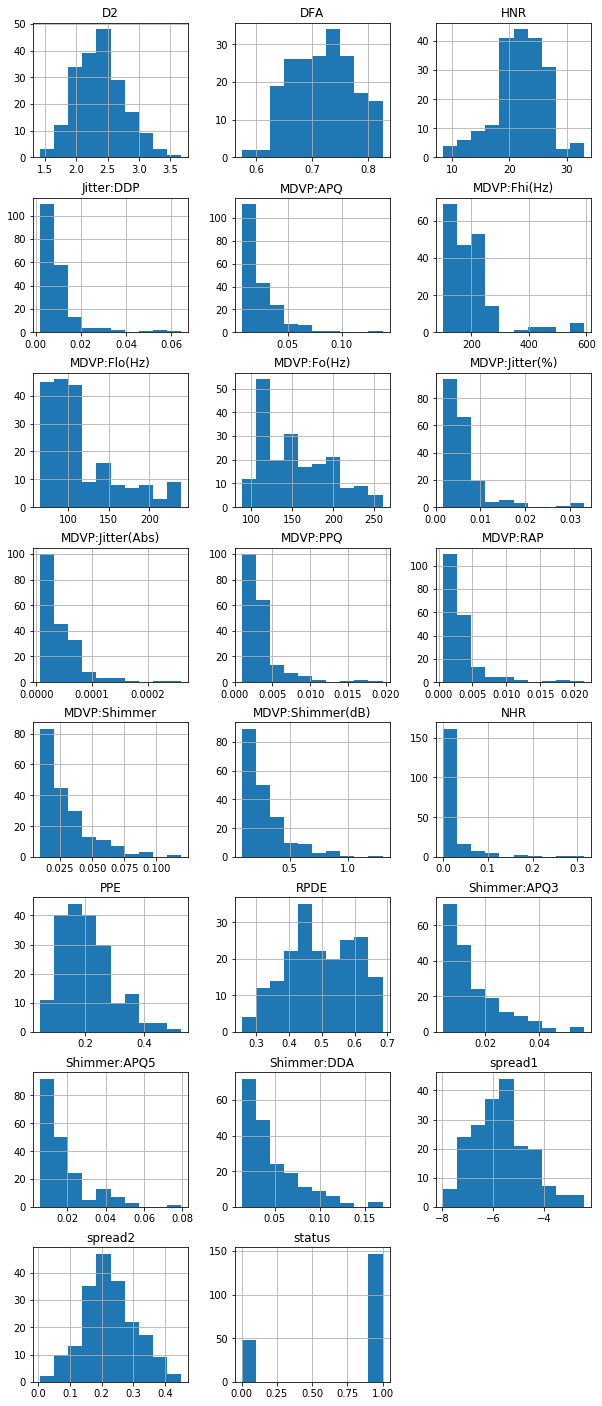

In [72]:
"""Histograms of numeric features"""
data.hist(layout=(8, 3), figsize=(10,25))
plt.show()

In [73]:
def data_split() -> Tuple[pd.Series, pd.Series, pd.DataFrame, pd.DataFrame]:
    y = data['status']
    # Remove name (string value) & status (class label) from attributes.
    X = data.drop(columns=['name', 'status'])
    return sk.model_selection.train_test_split(y, X, test_size=0.2)


train_y, test_y, train_X, test_X = data_split()

In [76]:
standard_scaler = sk.preprocessing.StandardScaler()

svm_clf = sk.pipeline.Pipeline(steps=[
    ('scale', standard_scaler),
    ('svc', sk.svm.SVC())
])

logit_clf = sk.pipeline.Pipeline(steps=[
    ('scale', standard_scaler),
    ('logit', sk.linear_model.LogisticRegression())
])

ensemble_clf = sk.ensemble.VotingClassifier(
    estimators=[('svc', svm_clf), ('logit', logit_clf)]
)


svm_pred = svm_clf.fit(train_X, train_y).predict(test_X)
logit_pred = logit_clf.fit(train_X, train_y).predict(test_X)
ensemble_pred = ensemble_clf.fit(train_X, train_y).predict(test_X)

print(f"SVM:      {sk.metrics.f1_score(test_y, svm_pred):.5}")
print(f"Logit:    {sk.metrics.f1_score(test_y, logit_pred):.5}")
print(f"Ensemble: {sk.metrics.f1_score(test_y, ensemble_pred):.5}")

SVM:      0.90323
Logit:    0.91525
Ensemble: 0.91525


/home/alastair/Documents/ml/env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alastair/Documents/ml/env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


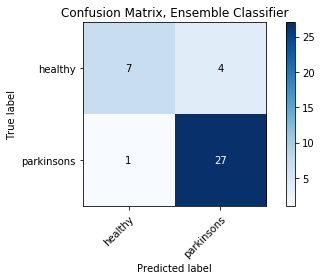

In [79]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          print_text=False,
                          cmap=plt.cm.Blues) -> mpl.axes.Axes:
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    Copyright (c) 2007–2019 The scikit-learn developers.
    Used under license.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = sk.metrics.confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    # classes = classes[sk.utils.multiclass.unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    if print_text:
        if normalize:
            print("Normalized confusion matrix")
        else:
            print('Confusion matrix, without normalization')
        print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


__disregard = plot_confusion_matrix(
    test_y, ensemble_pred, ['healthy', 'parkinsons'],
    title="Confusion Matrix, Ensemble Classifier")
plt.show()


## 2. Tasmanian Abalone Data Set

----

### Background Information

   Predicting the age of abalone from physical measurements.  The age of
   abalone is determined by cutting the shell through the cone, staining it,
   and counting the number of rings through a microscope -- a boring and
   time-consuming task.  Other measurements, which are easier to obtain, are
   used to predict the age.  Further information, such as weather patterns
   and location (hence food availability) may be required to solve the problem.

   From the original data examples with missing values were removed (the
   majority having the predicted value missing), and the ranges of the
   continuous values have been scaled for use with an ANN (by dividing by 200).
   
* Number of Instances: 4177

* Number of Attributes: 8
  
----

### Source

Original owners of database:<br>
Marine Resources Division<br>
Marine Research Laboratories - Taroona<br>
Department of Primary Industry and Fisheries, Tasmania<br>

Date received: December 1995

----
### Attribute information:

   Given is the attribute name, attribute type, the measurement unit and a
   brief description.  The number of rings is the value to predict: either
   as a continuous value or as a classification problem.

	Name		    Data Type	Meas.	Description
	----		    ---------	-----	-----------
	Sex             nominal			    M, F, and I (infant)
	Length          continuous	mm      Longest shell measurement
	Diameter        continuous	mm      perpendicular to length
	Height          continuous	mm      with meat in shell
	Whole weight    continuous	grams   whole abalone
	Shucked weight  continuous	grams   weight of meat
	Viscera weight  continuous	grams   gut weight (after bleeding)
	Shell weight    continuous	grams   after being dried
	Rings           integer               +1.5 gives the age in years

----
### Citations
Warwick J Nash, Tracy L Sellers, Simon R Talbot, Andrew J Cawthorn and
Wes B Ford (1994) "The Population Biology of Abalone (_Haliotis_
species) in Tasmania. I. Blacklip Abalone (_H. rubra_) from the North
Coast and Islands of Bass Strait", Sea Fisheries Division, Technical
Report No. 48 (ISSN 1034-3288)

## 2.1 Data Overview

In [3]:
data_url = 'abalone.data'

attribute_names = [
    'Sex',
    'Length',
    'Diameter',
    'Height',
    'Whole weight',
    'Shucked weight',
    'Viscera weight',
    'Shell weight',
    'Rings',
]
data = pd.read_csv(data_url, names=attribute_names)

In [5]:
"""Sample data instances"""
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


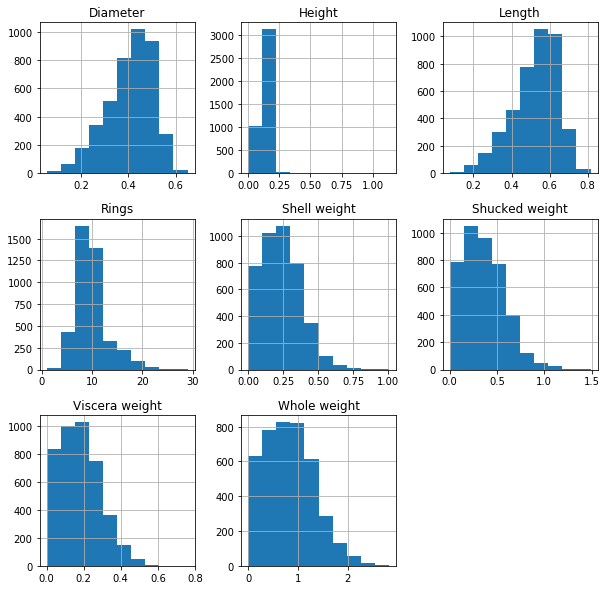

In [10]:
"""Histograms of numeric features."""
data.hist(layout=(3,3), figsize=(10,10))
plt.show()

In [7]:
"""Checking distributions of numerical features"""
data.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


### 2.2 Data cleaning



##### Handling Sex Attribute

Because male and female abalone share a similar distribution but infant has a lower median ring count (see plot below), the male and female data instances have been grouped and the 'sex' attribute changed to a binary 'is adult' attribute.

##### Handling Outlier Ring Counts

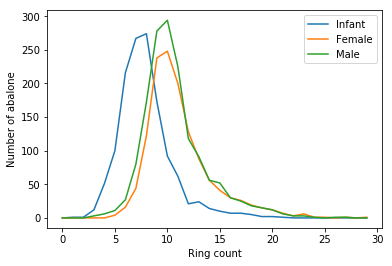

In [12]:
def plot_rings_vs_sex(data):
    """
    Creates separate plots of infant, female and male ring count frequencies.

    Returns
    -------
        
    """
    infant_rings = []
    female_rings = []
    male_rings = []
    for i in range(len(data)):
        if data.loc[i, 'Sex'] == 'I':
            infant_rings.append(data.loc[i, 'Rings'])
        elif data.loc[i, 'Sex'] == 'F':
            female_rings.append(data.loc[i, 'Rings'])
        elif data.loc[i, 'Sex'] == 'M':
            male_rings.append(data.loc[i, 'Rings'])
    
    ages = range(0, 30)
    infant_ages = [infant_rings.count(i) for i in ages]
    female_ages = [female_rings.count(i) for i in ages]
    male_ages = [male_rings.count(i) for i in ages]

    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(ages, infant_ages, label='Infant')
    ax.plot(ages, female_ages, label='Female')
    ax.plot(ages, male_ages, label='Male')

    ax.set_ylabel('Number of abalone')
    ax.set_xlabel('Ring count')
    plt.legend(loc='upper right')

    return fig

plot_rings_vs_sex(data)
plt.show()

In [24]:
def handle_ring_outliers(data: Any, method: str) -> pd.DataFrame:

    def group(data: pd.DataFrame) -> pd.DataFrame:
        for i in range(len(data)):
            if 5 > data.loc[i, 'Rings']:
                data.loc[i, 'Rings'] = 4
            elif 20 < data.loc[i, 'Rings']:
                data.loc[i, 'Rings'] = 21
        return data

    def drop(data: pd.DataFrame) -> pd.DataFrame:
        for i in range(len(data)):
            if not 5 <= data.loc[i, 'Rings'] <= 20:
                data = data.drop(i)
        return data
    
    if method == 'group':
        return group(data)

    elif method == 'drop':
        return drop(data)
    else:
        return data


def clean_data(data: pd.DataFrame, ring_handler='none')\
 -> Tuple[pd.DataFrame, pd.DataFrame, pd.Series, pd.Series]:
    """
    Clean data then split into test & training sets.

    Returns:
        data (pd.Dataframe):
        ring_handler (str):

    Returns:
        Tuple[pd.Series, pd.Series, pd.DataFrame, pd.DataFrame]:
            Tuple containing class labels & class attributes.
    """
    def handle_sex_attribute(data: pd.DataFrame) -> pd.DataFrame:
        is_adult = []
        for i in range(len(data)):
            if data.loc[i, 'Sex'] == 'I':
                is_adult.append(0)
            else:
                is_adult.append(1)
        is_adult_df = pd.DataFrame(is_adult, columns=['Is adult'])
        data = pd.concat([data, is_adult_df], axis=1)
        return data

    # Avoid editing original data
    data = dc(data)

    # Replace Sex attribute with 'Is adult' value.
    data = handle_sex_attribute(data)

    # Drop, group, or do nothing with outlier ring counts.
    data = handle_ring_outliers(data, ring_handler)

    y = data['Rings']
    x = data.drop(columns=['Sex', 'Rings'])

    split_data = model_selection.train_test_split(y, x, test_size=0.1)
    train_y, test_y, train_x, test_x = split_data

    train_y = train_y.reset_index()['Rings']
    test_y = test_y.reset_index()['Rings']
    train_x = train_x.reset_index().drop(columns=['index'])
    test_x = test_x.reset_index().drop(columns=['index'])

    return (train_x, test_x, train_y, test_y)

train_x, test_x, train_y, test_y = clean_data(data)


In [23]:
def reg_mse(regressor: Any,
            train_x: pd.DataFrame, test_x: pd.DataFrame,
            train_y: pd.Series, test_y: pd.Series)\
 -> Tuple[float, float]:
    """
    Calculatee mean squared error loss of both test and training data
    on given regressor.
    """
    reg = regressor.fit(train_x, train_y)
    train_pred = reg.predict(train_x)
    test_pred = reg.predict(test_x)
    #train_mse = metrics.mean_squared_error(train_y, train_pred)
    test_mse = metrics.mean_squared_error(test_y, test_pred)
    return test_mse


def test_regressor_ring_handling(train_x, test_x, train_y, test_y):
    """
    Runs regressions with outlier rings dropped, grouped and left as is.
    """
    def handle_ring_outliers_xy(x: pd.DataFrame, y: pd.Series, method: str)\
     -> Tuple[pd.DataFrame, pd.Series]:
        data = pd.concat([x, y], axis=1)
        data = handle_ring_outliers(data, method=method)
        y = data['Rings']
        x = data.drop(columns=['Rings'])
        return (x, y)

    results = []
    for handler in ['none', 'drop', 'group']:
        _train_x, _train_y =\
            handle_ring_outliers_xy(train_x, train_y, handler)
        _test_x, _test_y =\
            handle_ring_outliers_xy(test_x, test_y, handler)

        reg = sk.ensemble.RandomForestRegressor(n_estimators=100)\
            .fit(_train_x, _train_y)
        mse = reg_mse(reg, _train_x, _test_x, _train_y, _test_y)
        results.append([handler, mse])
    headers = ['Ring Handler', 'Test MSE']
    return pd.DataFrame(results, columns=headers)

print(test_regressor_ring_handling(train_x, test_x, train_y, test_y))

  Ring Handler  Test MSE
0         none  4.836510
1         drop  4.840823
2        group  4.861396


## 2.3 Feature Importance

In [18]:
rf_reg = sk.ensemble.RandomForestRegressor(n_estimators=100)
rf_reg_fit = dc(rf_reg).fit(train_x, train_y)


def rank_feature_importance(reg_fitted, columns):
    """ Return a list of (feature, importance) tuples."""
    _reg = dc(reg_fitted)
    importance = _reg.feature_importances_
    assert(len(importance) == len(columns))
    feat_impo = []
    for i, feature in enumerate(columns):
        feat_impo.append((feature, importance[i]))
    feat_impo.sort(key=lambda x: x[1], reverse=True)
    return feat_impo

imp = rank_feature_importance(rf_reg_fit, train_x.columns)
names = ['Feature', 'Importance']
print(pd.DataFrame(imp, columns=names))

          Feature  Importance
0    Shell weight    0.481703
1  Shucked weight    0.166864
2    Whole weight    0.084123
3  Viscera weight    0.079468
4          Height    0.056777
5          Length    0.053342
6        Diameter    0.051560
7        Is adult    0.026163


## 2.4 Manual Feature Reduction

In [26]:
def manual_feature_reduction(train_x, test_x, feat, n)\
 -> Tuple[pd.DataFrame, pd.DataFrame]:
    """ Remove the n least important features."""
    feat.sort(key=lambda x: x[1])
    if type(feat[0]) is tuple:
        feat = [f[0] for f in feat]

    _train_x = dc(train_x).drop(columns=feat[:n])
    _test_x = dc(test_x).drop(columns=feat[:n])
    return (_train_x, _test_x)


def test_manual_feature_reduction():
    results = []
    for i in range(8):
        xtr, xte = manual_feature_reduction(train_x, test_x, imp, n=i)
        _reg2 = rf_reg.fit(xtr, train_y)
        mse = reg_mse(_reg2, xtr, xte, train_y, test_y)
        results.append([i, mse])
    names = ['Features Dropped', 'Test MSE']
    return pd.DataFrame(results, columns=names)

print(test_manual_feature_reduction())

   Features Dropped  Test MSE
0                 0  4.259760
1                 1  4.254457
2                 2  4.246492
3                 3  4.376849
4                 4  4.660457
5                 5  4.741996
6                 6  5.091587
7                 7  5.559781


## 2.4 PCA Feature Reduction